In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
df=pd.read_csv(r"E:\CreditCardDefaultPrediction\notebooks\data\creditCardFraud_28011964_120214.csv")

In [3]:
df.head()

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0      50000    1          2         1   57     -1      0     -1      0   
1      50000    1          1         2   37      0      0      0      0   
2     500000    1          1         2   29      0      0      0      0   
3     100000    2          2         2   23      0     -1     -1      0   
4     140000    2          3         1   28      0      0      2      0   

   PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0      0  ...      20940      19146      19131      2000     36681     10000   
1      0  ...      19394      19619      20024      2500      1815       657   
2      0  ...     542653     483003     473944     55000     40000     38000   
3      0  ...        221       -159        567       380       601         0   
4      0  ...      12211      11793       3719      3329         0       432   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0      9000       689       679                           0  
1      1000      1000       800                           0  
2     20239     13750     13770                           0  
3       581      1687      1542                           0  
4      1000      1000      1000                           0  

[5 rows x 24 columns]

In [4]:
df.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [5]:
df.drop_duplicates(inplace=True)
df.head()

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0      50000    1          2         1   57     -1      0     -1      0   
1      50000    1          1         2   37      0      0      0      0   
2     500000    1          1         2   29      0      0      0      0   
3     100000    2          2         2   23      0     -1     -1      0   
4     140000    2          3         1   28      0      0      2      0   

   PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0      0  ...      20940      19146      19131      2000     36681     10000   
1      0  ...      19394      19619      20024      2500      1815       657   
2      0  ...     542653     483003     473944     55000     40000     38000   
3      0  ...        221       -159        567       380       601         0   
4      0  ...      12211      11793       3719      3329         0       432   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0      9000       689       679                           0  
1      1000      1000       800                           0  
2     20239     13750     13770                           0  
3       581      1687      1542                           0  
4      1000      1000      1000                           0  

[5 rows x 24 columns]

In [6]:
df.shape

(1001, 24)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   1001 non-null   int64
 1   SEX                         1001 non-null   int64
 2   EDUCATION                   1001 non-null   int64
 3   MARRIAGE                    1001 non-null   int64
 4   AGE                         1001 non-null   int64
 5   PAY_0                       1001 non-null   int64
 6   PAY_2                       1001 non-null   int64
 7   PAY_3                       1001 non-null   int64
 8   PAY_4                       1001 non-null   int64
 9   PAY_5                       1001 non-null   int64
 10  PAY_6                       1001 non-null   int64
 11  BILL_AMT1                   1001 non-null   int64
 12  BILL_AMT2                   1001 non-null   int64
 13  BILL_AMT3                   1001 non-null   int64
 14  BILL_AMT

<Axes: >

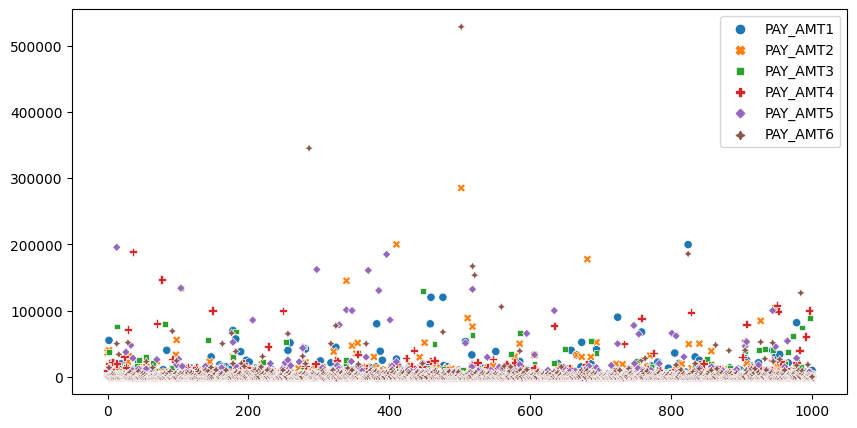

In [8]:
plt.figure(figsize=(10,5))
sns.scatterplot(df[["PAY_AMT1"	,"PAY_AMT2"	,"PAY_AMT3",	"PAY_AMT4",	"PAY_AMT5"	,"PAY_AMT6"]])

<Axes: ylabel='Count'>

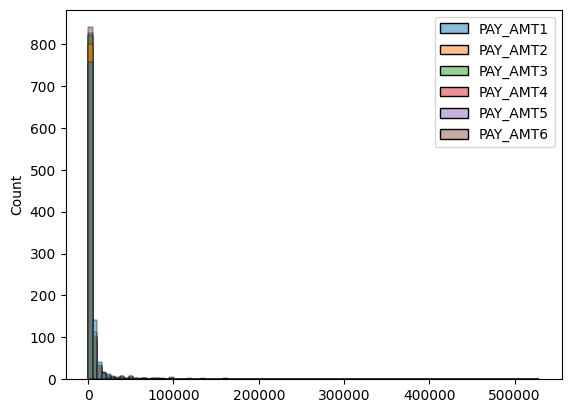

In [9]:
sns.histplot(df[["PAY_AMT1"	,"PAY_AMT2"	,"PAY_AMT3","PAY_AMT4",	"PAY_AMT5"	,"PAY_AMT6"]],bins=100)

In [10]:
df.describe()

LIMIT_BAL          SEX    EDUCATION     MARRIAGE          AGE  \
count    1001.000000  1001.000000  1001.000000  1001.000000  1001.000000   
mean   167532.467532     1.589411     1.776224     1.604396    34.945055   
std    130587.921320     0.492187     0.750916     0.532298     9.219760   
min     10000.000000     1.000000     1.000000     0.000000    21.000000   
25%     50000.000000     1.000000     1.000000     1.000000    28.000000   
50%    140000.000000     2.000000     2.000000     2.000000    33.000000   
75%    240000.000000     2.000000     2.000000     2.000000    41.000000   
max    700000.000000     2.000000     6.000000     3.000000    75.000000   

             PAY_0        PAY_2        PAY_3        PAY_4        PAY_5  ...  \
count  1001.000000  1001.000000  1001.000000  1001.000000  1001.000000  ...   
mean     -0.004995    -0.161838    -0.164835    -0.283716    -0.283716  ...   
std       1.173446     1.228732     1.262459     1.184662     1.170224  ...   
min      -2.000000    -2.000000    -2.000000    -2.000000    -2.000000  ...   
25%      -1.000000    -1.000000    -1.000000    -1.000000    -1.000000  ...   
50%       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
75%       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
max       8.000000     7.000000     7.000000     7.000000     7.000000  ...   

           BILL_AMT4      BILL_AMT5      BILL_AMT6       PAY_AMT1  \
count    1001.000000    1001.000000    1001.000000    1001.000000   
mean    40748.408591   39078.666334   38012.011988    5382.339660   
std     68206.929510   63108.238729   63074.415024   12180.755275   
min     -3684.000000  -28335.000000 -339603.000000       0.000000   
25%      1423.000000    1206.000000     830.000000    1000.000000   
50%     17710.000000   17580.000000   15846.000000    2184.000000   
75%     48851.000000   46404.000000   46557.000000    5090.000000   
max    628699.000000  484612.000000  473944.000000  199646.000000   

            PAY_AMT2       PAY_AMT3       PAY_AMT4       PAY_AMT5  \
count    1001.000000    1001.000000    1001.000000    1001.000000   
mean     5051.400599    4176.149850    4671.488511    5331.049950   
std     15626.153184   10514.647502   13269.943983   16812.536877   
min         0.000000       0.000000       0.000000       0.000000   
25%       390.000000     228.000000     148.000000     189.000000   
50%      1710.000000    1206.000000    1398.000000    1306.000000   
75%      4500.000000    3720.000000    4000.000000    3745.000000   
max    285138.000000  133657.000000  188840.000000  195599.000000   

            PAY_AMT6  default payment next month  
count    1001.000000                 1001.000000  
mean     5090.704296                    0.213786  
std     23658.888052                    0.410183  
min         0.000000                    0.000000  
25%         0.000000                    0.000000  
50%      1250.000000                    0.000000  
75%      3784.000000                    0.000000  
max    528666.000000                    1.000000  

[8 rows x 24 columns]

<Axes: xlabel='LIMIT_BAL', ylabel='AGE'>

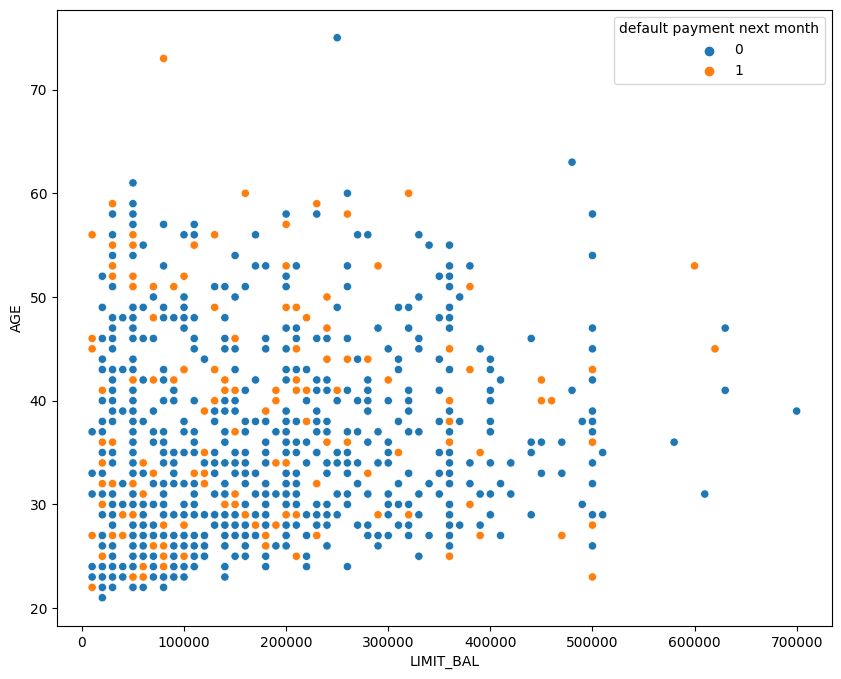

In [11]:
plt.figure(figsize=(10,8))
sns.scatterplot(x="LIMIT_BAL",y="AGE",hue="default payment next month",data=df)

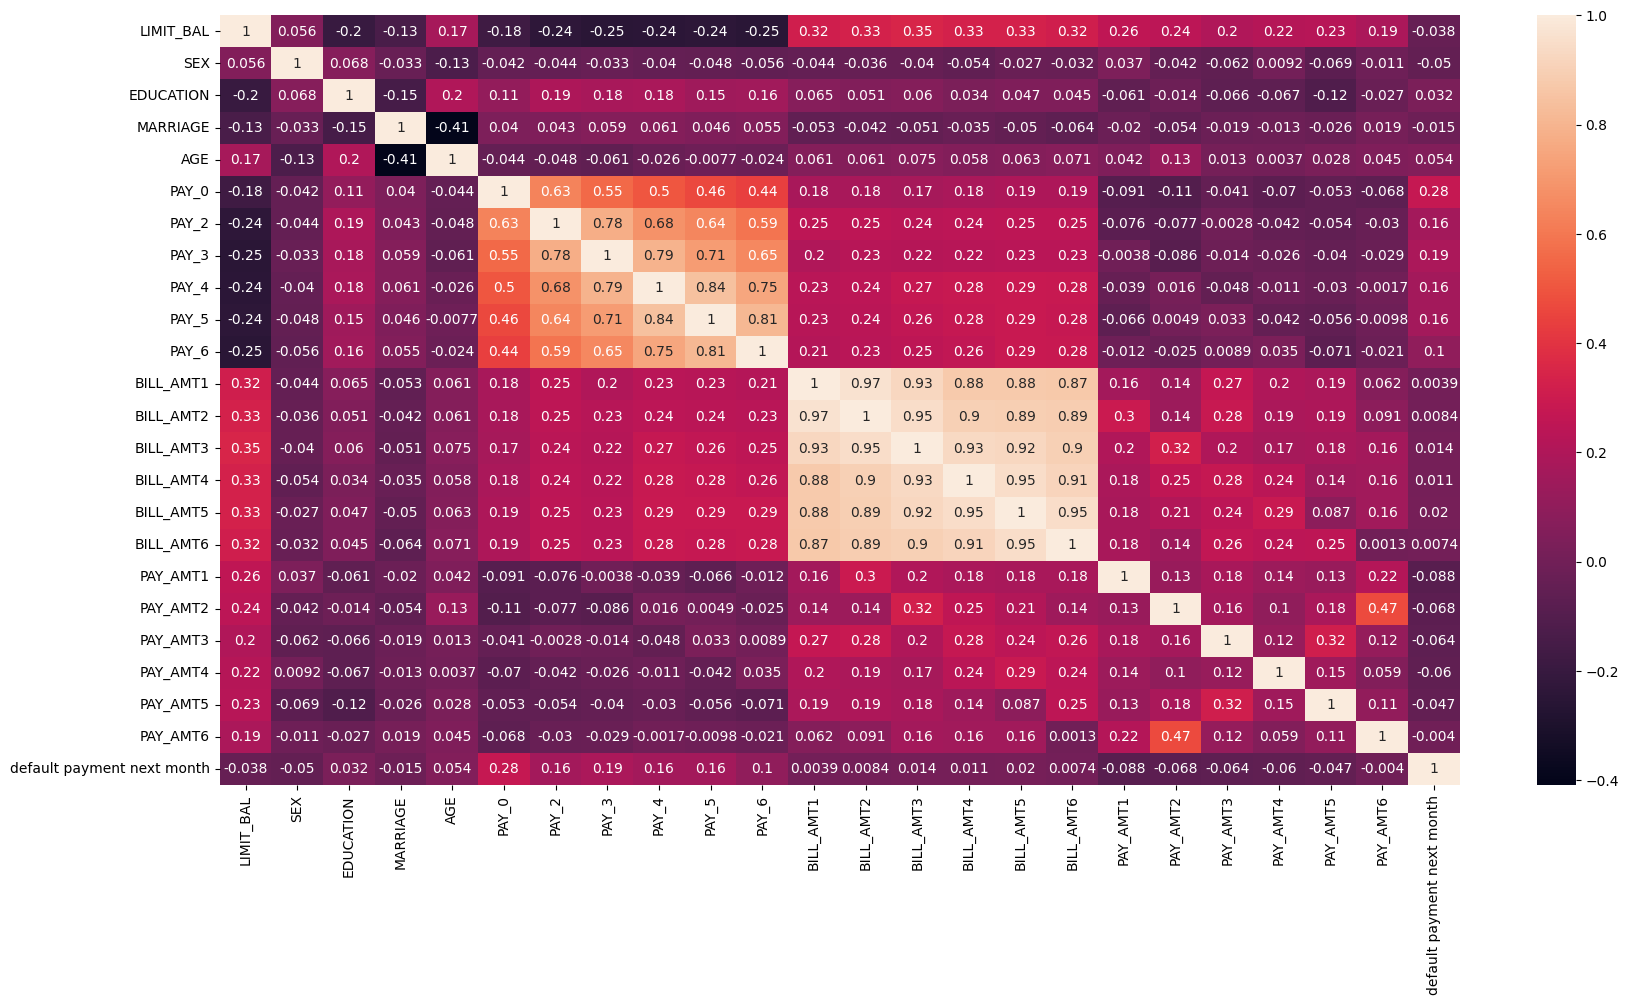

In [12]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

<Figure size 2000x1000 with 0 Axes>

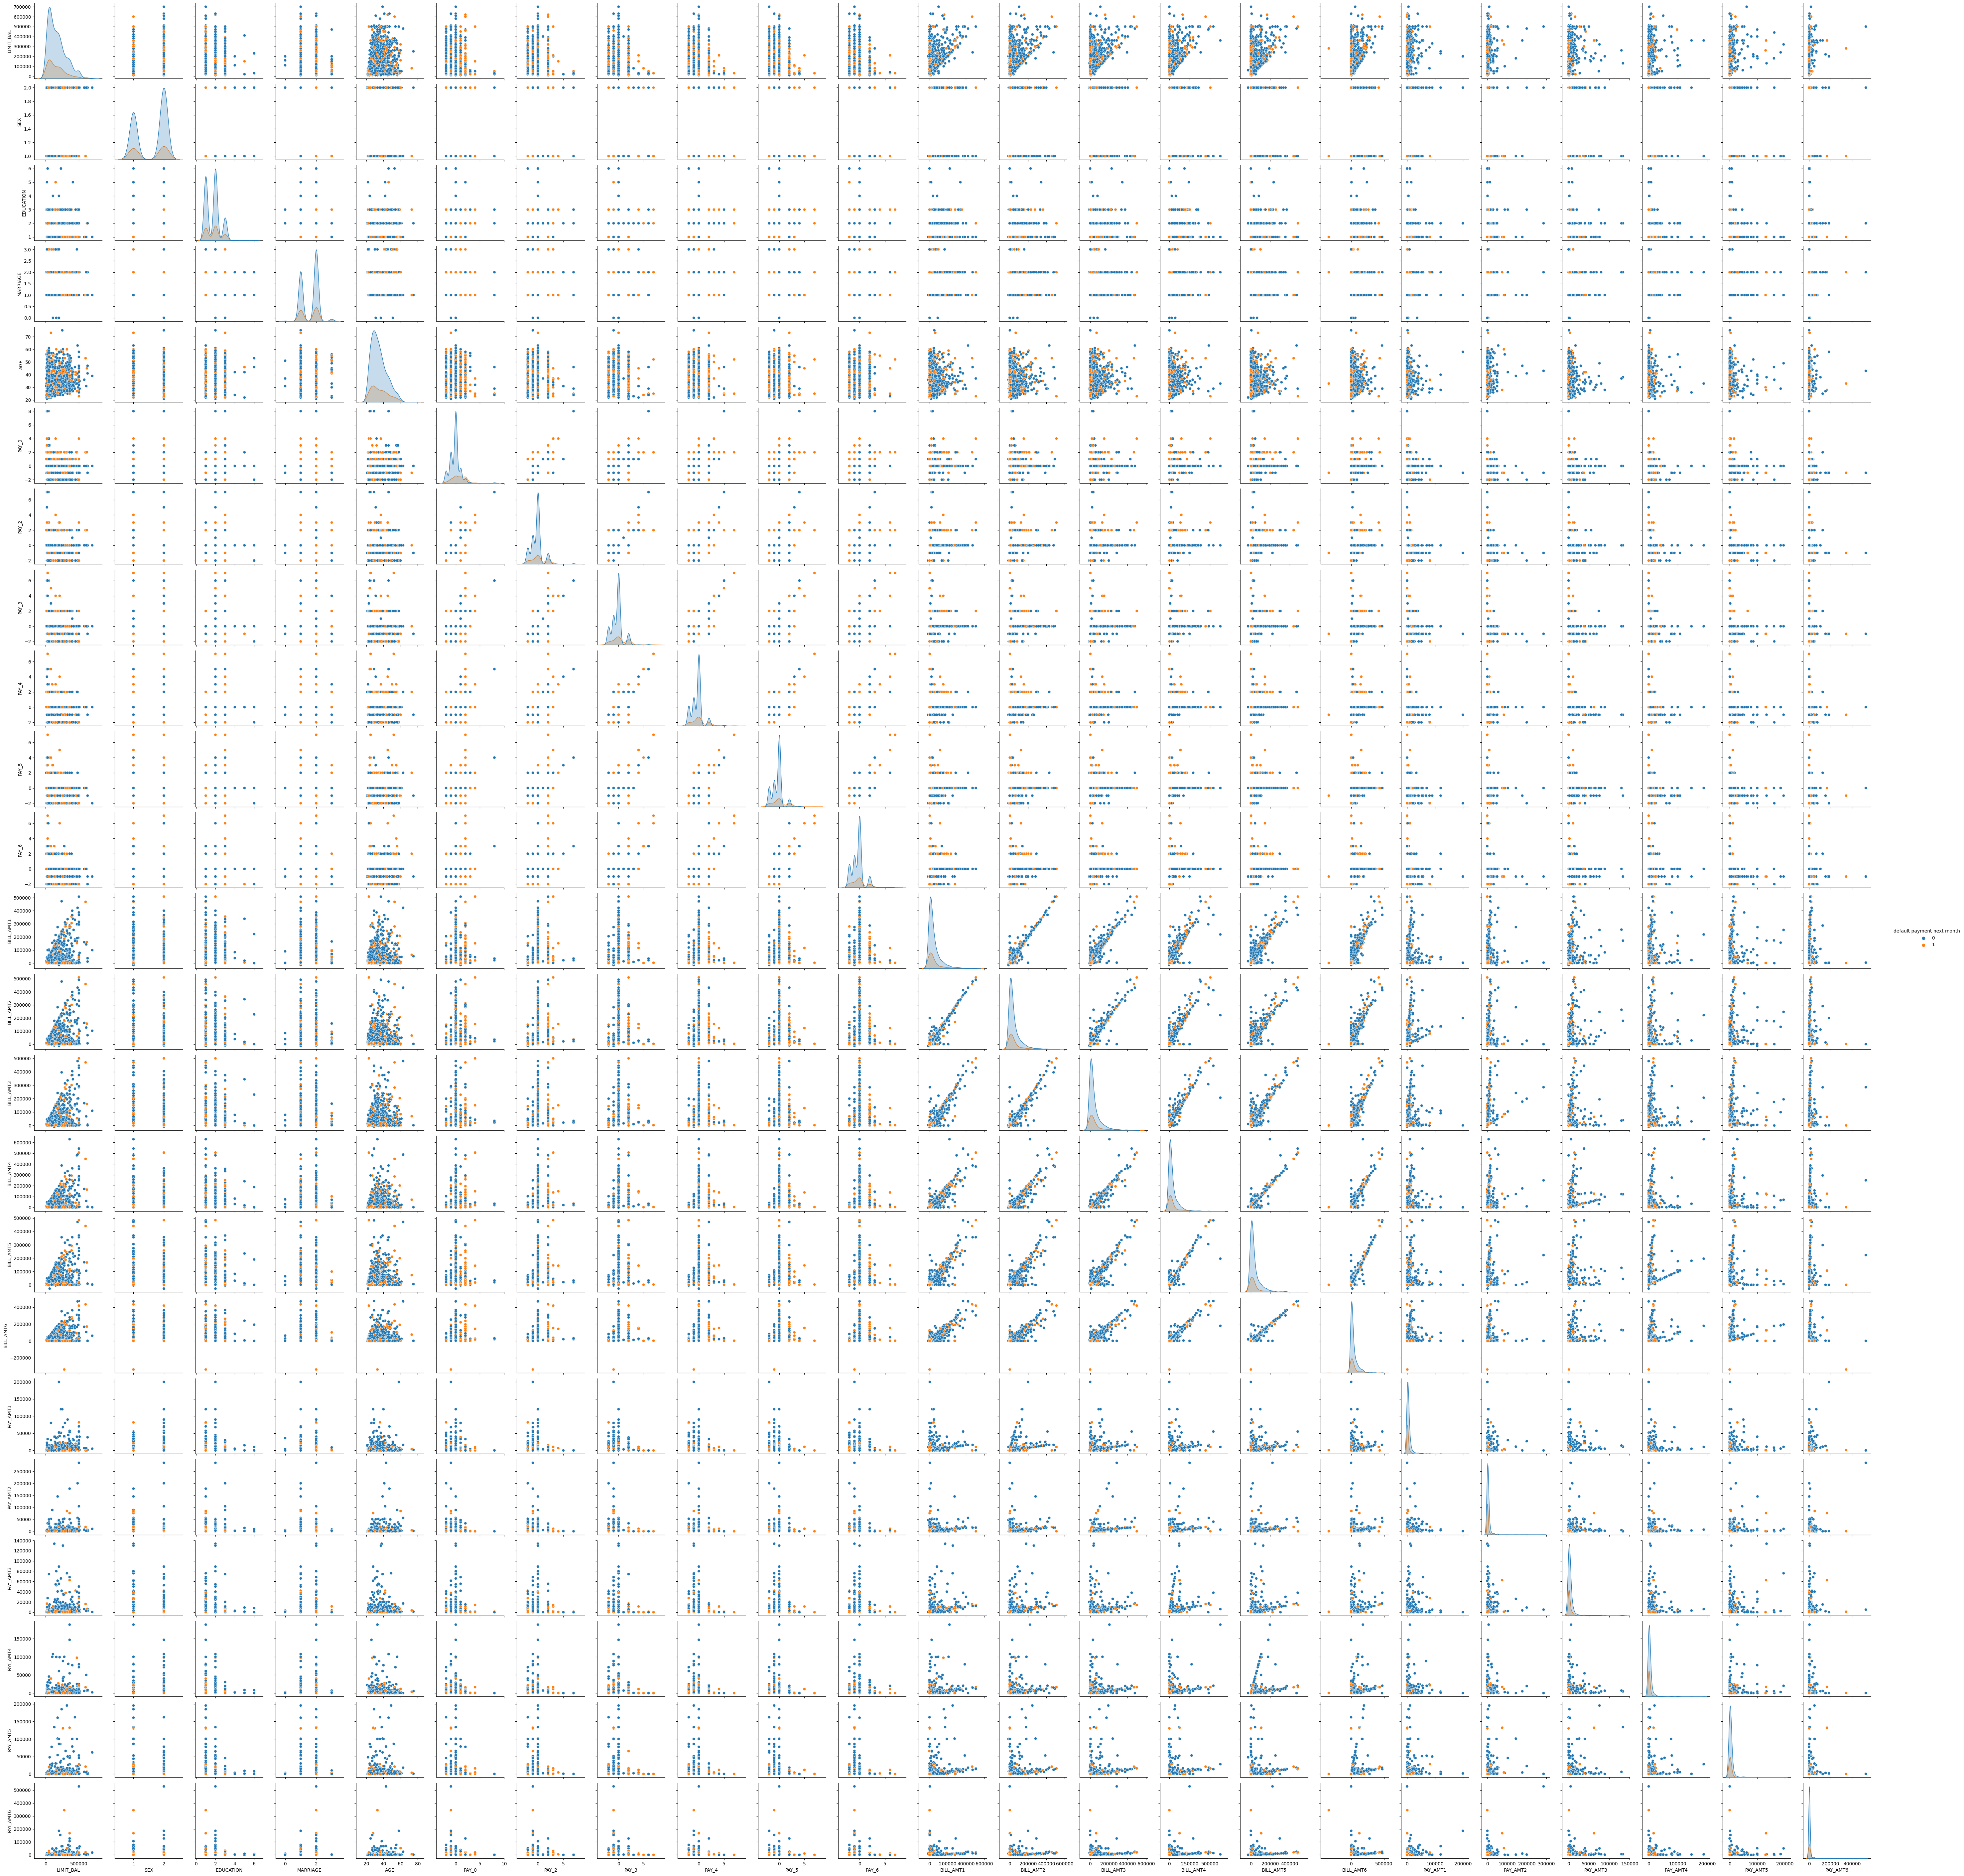

In [13]:
plt.figure(figsize=(20,10))
sns.pairplot(df,hue="default payment next month")